### Import the library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn import metrics

### Import the library

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

### Split the dataset into train and test set

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

### Feature Scaling

In [4]:
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

### Fitting SVM Classifier to the training set

In [5]:
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### Predict the test result

In [6]:
y_pred = classifier.predict(x_test)

### Accuracy Score & Confusion Matrix

In [7]:
print("Confusion matrix : \n",metrics.confusion_matrix(y_pred,y_test))
print("Accuracy Score : ",metrics.accuracy_score(y_pred,y_test))

Confusion matrix : 
 [[64  3]
 [ 4 29]]
Accuracy Score :  0.93


### Visualizing the training result

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


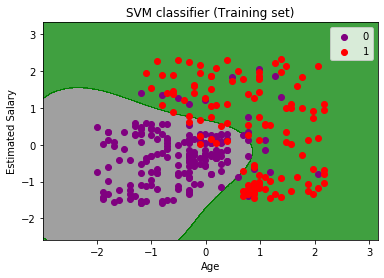

In [8]:
x_set,y_set=x_train,y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                   np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('grey','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('purple','red'))(i),label=j)
plt.title('SVM classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualizing the test set result

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


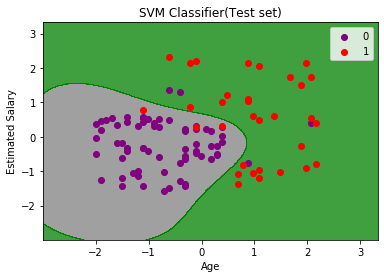

In [9]:
x_set,y_set = x_test,y_test
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,1].max()+1,step=0.01),
                   np.arange(start=x_set[:,0].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('grey','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('purple','red'))(i),label=j)
plt.title("SVM Classifier(Test set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()